# Running instructions

## Change working directory

In [ ]:
cd ~/workspace/genome_data/annotations/e_coli/gene_sequences/fhu_system

## Obtained variants from the multiple sequence alignment files

In [ ]:
snp-sites -v -o variants.vcf aligned.fna

## Extract patristic distances from a phylogeny

In [ ]:
python ~/workspace/pyseer/scripts/phylogeny_distance.py tree.nwk  > phylogeny_dists.tsv

## Performed GWAS

In [ ]:
pyseer --phenotypes /home/vmadmin/workspace/ehr_data/data/full_cohort/tube_id_mortality.pheno --vcf variants.vcf --lineage > mortality_SNPs.txt

### Format output

In [ ]:
cat <(echo "#CHR SNP BP minLOG10(P) log10(p) r^2") <(paste <(sed '1d' mortality_SNPs.txt | cut -d "_" -f 2) <(sed '1d' mortality_SNPs.txt | cut -f 4) | awk '{p = -log($2)/log(10); print "1",".",$1,p,p,"0"}' ) | tr ' ' '\t' > mortality_snps.plot

## Visualise

In [ ]:
import os
import pandas as pd
from pathlib import Path


plotDf = pd.read_csv(
    Path(os.environ['GENOMICS_DATA_BASE'], 'annotations', 'e_coli', 'gene_sequences', 'fhu_system', 'mortality_snps.plot'),
    comment='#',
    sep='\t',
    names=["CHR", "SNP", "BP", "minLOG10_p", "log10_p", "r2"]
    )
plotDf

,CHR,SNP,BP,minLOG10_p,log10_p,r2
0,1,.,6,0.446117,0.446117,0
1,1,.,8,0.446117,0.446117,0
2,1,.,33,0.649752,0.649752,0
3,1,.,72,1.372630,1.372630,0
4,1,.,147,0.785156,0.785156,0
...,...,...,...,...,...,...
620,1,.,5891,0.903090,0.903090,0
621,1,.,5899,2.362510,2.362510,0
622,1,.,5920,0.777284,0.777284,0
623,1,.,5926,0.978811,0.978811,0


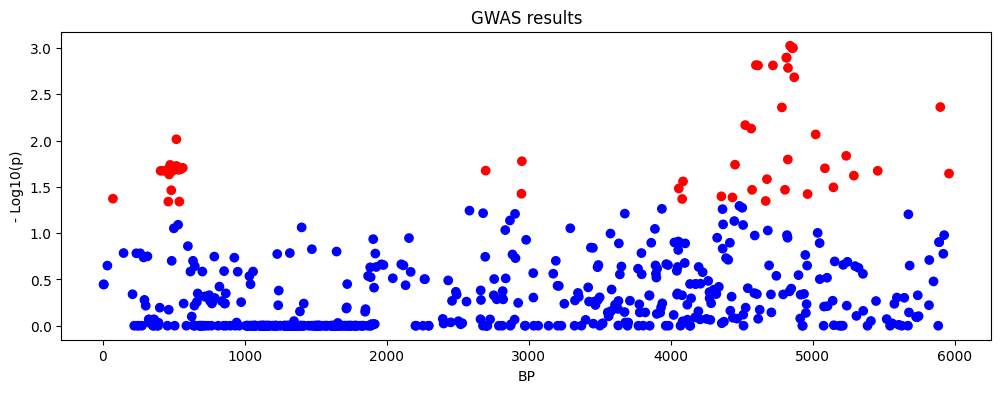

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(12, 4))

colors = ['red' if y > 1.301 else 'blue' for y in plotDf.log10_p]

# Create the scatter plot
ax.scatter(plotDf.BP, plotDf.log10_p, c=colors)

# Add labels and title for clarity
ax.set_xlabel("BP")
ax.set_ylabel("- Log10(p)")
ax.set_title("GWAS results")

# Display the plot
plt.show()


In [33]:
library(readr)

# Construct the file path using environment variable
genomics_data_base <- Sys.getenv("GENOMICS_DATA_BASE")
file_path <- file.path(genomics_data_base, "annotations", "e_coli", "gene_sequences", "fhu_system", "mortality_snps.plot")

# Read the file, skipping comment lines
plot.df <- read_tsv(
  file_path,
  comment = "#",
  col_names = c("CHR", "SNP", "BP", "minLOG10_p", "log10_p", "r2")
)

plot.df$p <- 10^(-plot.df$log10_p)
plot.df$SNP <- paste(plot.df$CHR, plot.df$BP, sep = "_")

head(plot.df)

Rows: 625 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): SNP
dbl (5): CHR, BP, minLOG10_p, log10_p, r2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CHR,SNP,BP,minLOG10_p,log10_p,r2,p
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1_6,6,0.446117,0.446117,0,0.3580000
1,1_8,8,0.446117,0.446117,0,0.3580000
1,1_33,33,0.649752,0.649752,0,0.2240000
1,1_72,72,1.372630,1.372630,0,0.0424004
1,1_147,147,0.785156,0.785156,0,0.1640001
1,1_210,210,0.340084,0.340084,0,0.4569998


In [34]:
# Bonferroni correction

-log10(0.05/nrow(plot.df))

[1] 4.09691

In [56]:
# Assuming you have a vector of p-values called 'p_values'
# and a desired significance level 'alpha'
p_values <- plot.df$p
alpha <- 0.05

# Use the p.adjust function with method=["bonferroni", "holm", "hochberg", "hommel", "BH", "BY"]
adjusted_p_values <- p.adjust(p_values, method = "BY")

# Compare adjusted p-values with alpha
significant <- adjusted_p_values < alpha

signif.snps <- plot.df$SNP[significant]

# length(signif.snps)
# print(length(signif.snps))
print(adjusted_p_values)

  [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
  [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [29] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [50] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [57] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [64] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [71] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [78] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [85] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [92] 1.0000

ERROR: Error in manhattan(plot.df, chr = "CHR", bp = "BP", snp = "SNP", p = "log10_p", : non-numeric argument to binary operator


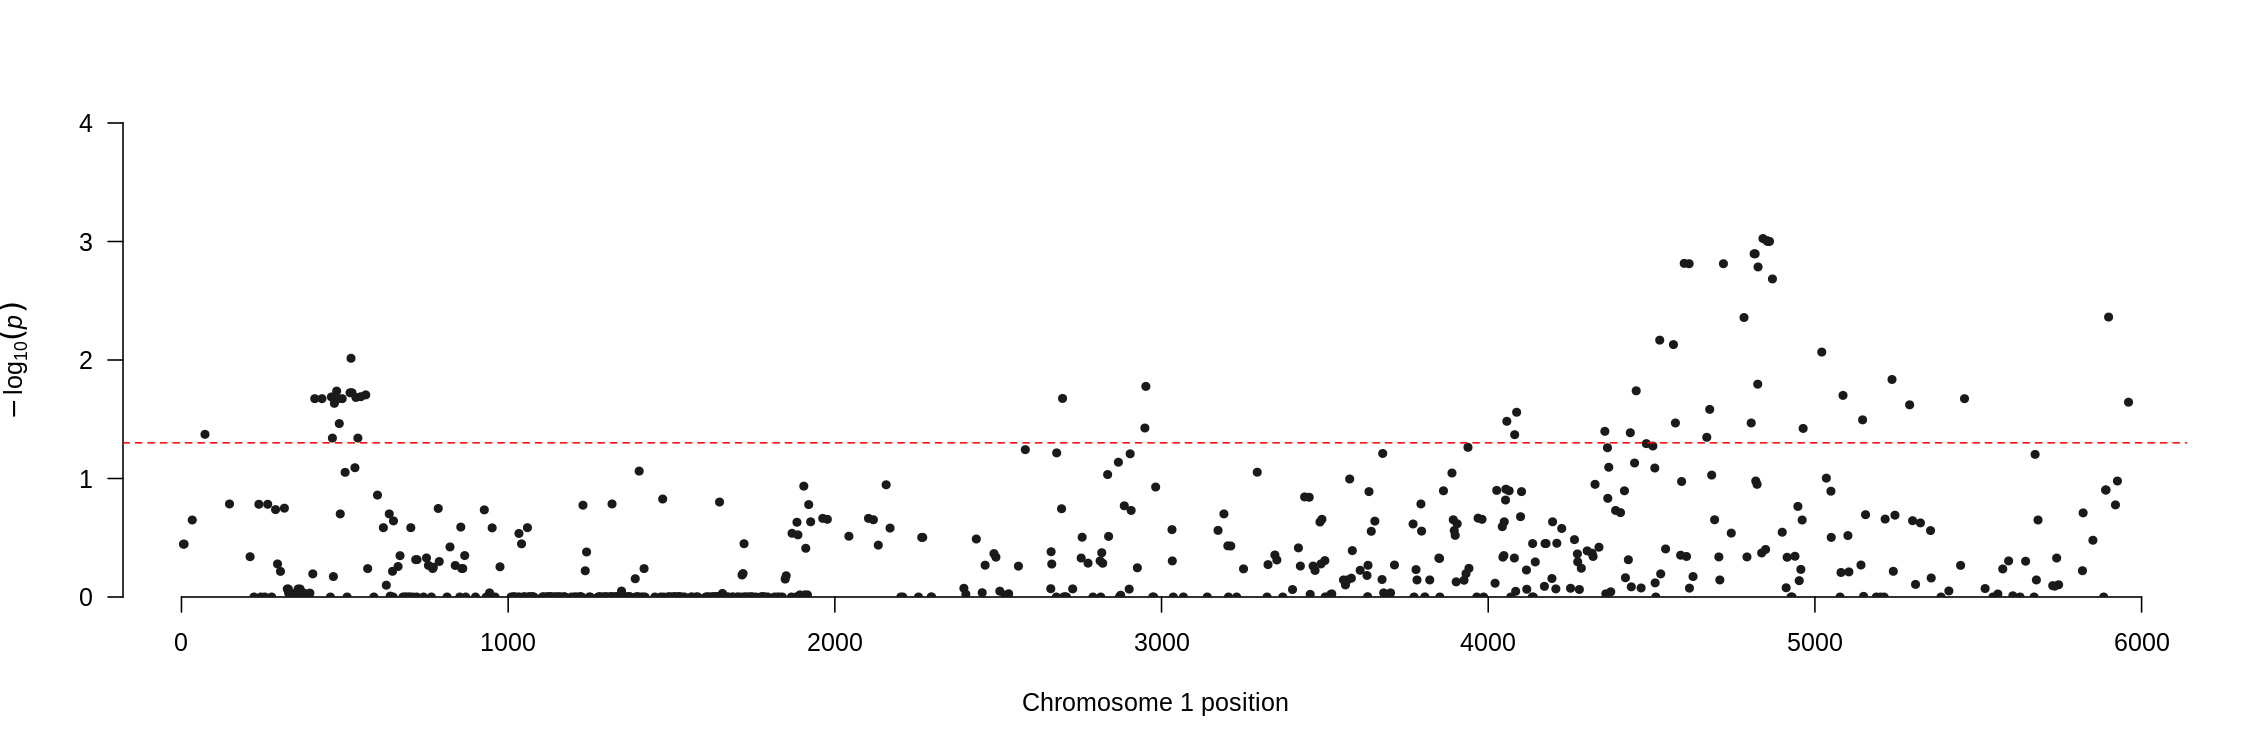

In [57]:
library(qqman)


# signif.snps <- plot.df$SNP[plot.df$log10_p > 1.301]

options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
manhattan(
    plot.df,
    chr="CHR",
    bp="BP",
    snp="SNP",
    p="log10_p",
    logp=FALSE,
    highlight = signif.snps
    ) +
    abline(h = 1.301, col = "red", lty = 2)

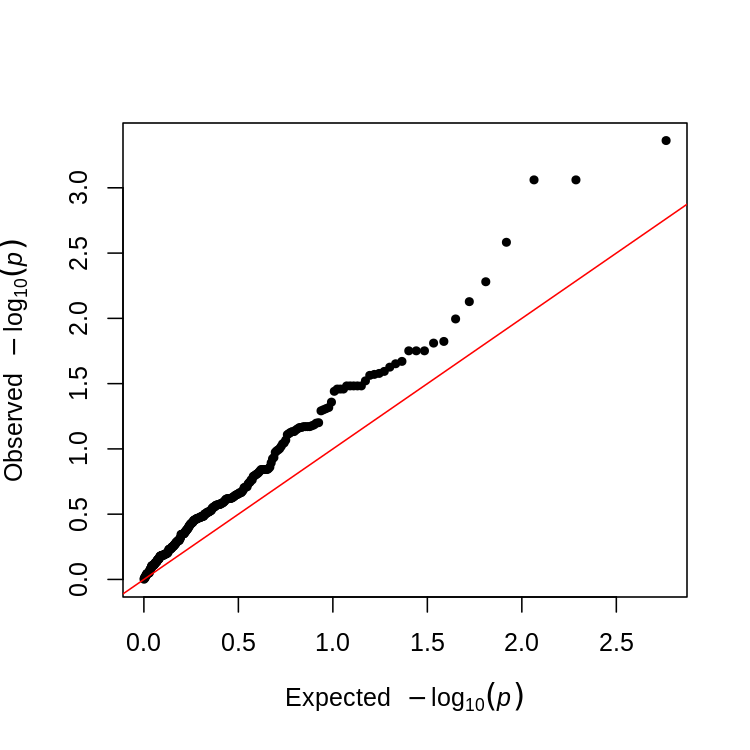

In [42]:
library(qqman)


options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
qq(plot.df$log10_p)